# Combining Met Police and Airbnb datasets

### Group 7

#### Authors: Trupti Kolvekar and Hannah Still

#### 1. Import libraries

In [1]:
# Import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

#### 2. Load the crime and airbnb datasets

In [2]:
#  Load the crime dataset .csv file
crime_df = pd.read_csv('data/csv/police_datasets/police_datasets_final_cleansed/cleansed_police_street_combined_FINAL.csv', header=0, sep=',')

# Print the DataFrame
print(crime_df.head(5))

  Crime ID    Month  Longitude   Latitude             Crime type   
0      NaN  2022-06   0.137065  51.583672  Anti-social behaviour  \
1      NaN  2022-06   0.140192  51.582311  Anti-social behaviour   
2      NaN  2022-06   0.137065  51.583672  Anti-social behaviour   
3      NaN  2022-06   0.137065  51.583672  Anti-social behaviour   
4      NaN  2022-06   0.140192  51.582311  Anti-social behaviour   

  Last outcome category matched_neighbourhood  
0                   NaN  Barking and Dagenham  
1                   NaN  Barking and Dagenham  
2                   NaN  Barking and Dagenham  
3                   NaN  Barking and Dagenham  
4                   NaN  Barking and Dagenham  


In [3]:
abnb_df = pd.read_csv('data/csv/airbnb_datasets/airbnbfiles_final_cleansed/cleansed_detailed_listings_FINAL.csv')

# inspect head and tail
abnb_df

,id,last_scraped,host_id,host_since,host_location,host_total_listings_count,borough,latitude,longitude,property_type,...,bathrooms_text,bedrooms,beds,price,number_of_reviews,review_scores_rating,minimum_nights,maximum_nights,has_availability,calculated_host_listings_count
0,714569379355913481,2023-03-14,39009854,2015-07-20,"London, United Kingdom",1.0,Haringey,51.597280,-0.139330,Private room in condo,...,1 shared bath,1.0,1.0,$100.00,0,NaN,1,365,t,1
1,808038970516277767,2023-03-14,495977998,2023-01-14,"London, United Kingdom",31.0,Barnet,51.636518,-0.177475,Entire rental unit,...,1 bath,1.0,1.0,$65.00,0,NaN,180,365,t,7
2,822557738577472503,2023-03-14,325629338,2020-01-08,NaN,8.0,Harrow,51.608180,-0.277400,Entire rental unit,...,2 baths,2.0,2.0,$132.00,0,NaN,2,28,t,4
3,3518856,2023-03-14,187811,2010-08-01,"London, United Kingdom",5.0,Merton,51.422310,-0.188410,Private room in rental unit,...,1 private bath,1.0,1.0,$100.00,4,3.67,5,1125,t,2
4,4876550,2023-03-14,25087384,2014-12-22,NaN,1.0,Barnet,51.602282,-0.193606,Entire condo,...,1 bath,1.0,1.0,$120.00,0,NaN,5,90,t,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141388,39286243,2022-06-08,301433244,2019-10-10,GB,0.0,Greenwich,51.497380,0.014140,Entire rental unit,...,2 baths,1.0,1.0,$151.00,5,4.60,2,365,t,1
141389,54279511,2022-06-08,124614495,2017-04-06,"Amsterdam, North Holland, Netherlands",0.0,Newham,51.512800,0.007800,Entire condo,...,2 baths,2.0,2.0,$105.00,1,5.00,7,112,t,1
141390,26365828,2022-06-08,14517363,2014-04-20,"Greater London, England, United Kingdom",8.0,Greenwich,51.481940,-0.016180,Entire rental unit,...,2 baths,2.0,3.0,$221.00,45,4.76,7,1125,t,7
141391,38661117,2022-06-08,1409439,2011-11-15,"London, England, United Kingdom",31.0,Greenwich,51.497750,0.013650,Entire condo,...,2 baths,3.0,6.0,$200.00,28,4.68,3,33,t,30


#### 3. Format the crime dataset prior to merge

In [4]:
# Convert headers to lowercase and replace whitespace with underscores
crime_df.columns = crime_df.columns.str.lower().str.replace(' ', '_')

# Convert columns to string type
crime_df = crime_df.astype(str) #this only works on string type so needs to be converted

# Convert row values to lowercase and replace whitespace with underscores
crime_df = crime_df.apply(lambda x: x.str.lower().str.replace(' ', '_'))

# Replace "NaN" values with actual NaN values
crime_df.replace("nan", np.nan, inplace=True)

# Convert the "month" column to datetime format for crime_df
crime_df['month'] = pd.to_datetime(crime_df['month'])

# Create a new column with the month names for crime_df
crime_df['month_name'] = crime_df['month'].dt.strftime('%B')

# Filter out the data for the desired months (December to March) excluding June
filtered_crime_df = crime_df[crime_df['month_name'] != 'June']

# Create separate dataframes for antisocial behavior and other crime types
asb_df = filtered_crime_df[filtered_crime_df['crime_type'] == 'anti-social_behaviour']
other_crime_df = filtered_crime_df[filtered_crime_df['crime_type'] != 'anti-social_behaviour']

# Group the data by matched_neighbourhood and calculate the count
crime_totals = other_crime_df.groupby('matched_neighbourhood').size().reset_index(name='Total')

# Calculate the total count of crimes
total_crime_count = crime_totals['Total'].sum()

# Group the data by matched_neighbourhood and calculate the count
asb_totals = asb_df.groupby('matched_neighbourhood').size().reset_index(name='Total')

# Calculate the total count of ASB incidents
total_asb_count = asb_totals['Total'].sum()

# Create a table with boroughs as rows and the total counts as columns
totals_table = pd.DataFrame({
    'Borough': [borough for borough in crime_totals['matched_neighbourhood']],
    'Total Crimes': crime_totals['Total'],
    'Total ASB Incidents': asb_totals['Total']
})

# Set the borough column as the index
totals_table = totals_table.set_index('Borough')

# Display the resulting table
print(totals_table)

                        Total Crimes  Total ASB Incidents
Borough                                                  
barking_and_dagenham            6708                 1231
barnet                          8878                 2283
bexley                          5084                 1107
brent                           9260                 2527
bromley                         7258                 1450
camden                         11645                 2724
city_of_london                  2731                  237
croydon                        10020                 2259
ealing                          9647                 2731
enfield                         9561                 2182
greenwich                       8264                 1650
hackney                         9370                 2062
hammersmith_and_fulham          6282                 1525
haringey                        9456                 2361
harrow                          4857                 1257
havering      

#### 4. Format the airbnb dataset prior to merging

In [73]:
# Convert headers to lowercase and replace whitespace with underscores
abnb_df.columns = abnb_df.columns.str.lower().str.replace(' ', '_')

# Convert columns to string type
abnb_df = abnb_df.astype(str) #this only works on string type so needs to be converted

# Convert row values to lowercase and replace whitespace with underscores
abnb_df = abnb_df.apply(lambda x: x.str.lower().str.replace(' ', '_'))

# Replace "NaN" values with actual NaN values
abnb_df.replace("nan", np.nan, inplace=True)

# Convert 'last_scraped' column to datetime
abnb_df['last_scraped'] = pd.to_datetime(abnb_df['last_scraped'])

# Set start and end dates 
start_date = pd.to_datetime('2022-12-11')
end_date = pd.to_datetime('2023-03-14')

# Filter the dataframe to include only rows that meet the above
abnb_filtered_df = abnb_df[(abnb_df['last_scraped'] >= start_date) & (abnb_df['last_scraped'] <= end_date)]

# Drop rows with 'Shared room' and 'Hotel room' values in the 'room_type' column
abnb_propfil_df = abnb_filtered_df[~abnb_filtered_df['room_type'].isin(['shared_room', 'hotel_room'])]

# make two categories
abnb_propfil_df['rental_type'] = abnb_propfil_df['property_type'].apply(lambda x: 'entire_property' if 'entire' in x else 'private_room')

# Remove any characters except digits and decimal point
abnb_propfil_df.loc[:, 'price'] = abnb_propfil_df['price'].apply(lambda x: re.sub(r'[^\d.]', '', str(x)))

# Convert 'price' column to float
abnb_propfil_df.loc[:, 'price'] = abnb_propfil_df['price'].astype(float)

# Separate the DataFrame for private_room rental type
private_room_df = abnb_propfil_df[abnb_propfil_df['rental_type'] == 'private_room']

# Convert review_scores_rating column to numeric
private_room_df['review_scores_rating'] = pd.to_numeric(private_room_df['review_scores_rating'], errors='coerce')

# Calculate the total count by borough for private_room rental type
private_room_totals = private_room_df.groupby('borough').size().rename('Total')

# Calculate the mean price by borough for private_room rental type
private_room_prices = private_room_df.groupby('borough')['price'].mean().rename('Mean Price')

# Calculate the mean review scores by borough for private_room rental type
private_room_ratings = private_room_df.groupby('borough')['review_scores_rating'].mean().rename('Mean Rating')

# Create a DataFrame for private_room rental type with boroughs as rows
private_room_table = pd.DataFrame({
    'Total': private_room_totals,
    'Mean Price': private_room_prices,
    'Mean Rating': private_room_ratings
})

# Separate the DataFrame for entire_property rental type
entire_property_df = abnb_propfil_df[abnb_propfil_df['rental_type'] == 'entire_property']

# Convert review_scores_rating column to numeric
entire_property_df['review_scores_rating'] = pd.to_numeric(entire_property_df['review_scores_rating'], errors='coerce')

# Calculate the total count by borough for entire_property rental type
entire_property_totals = entire_property_df.groupby('borough').size().rename('Total')

# Calculate the mean price by borough for entire_property rental type
entire_property_prices = entire_property_df.groupby('borough')['price'].mean().rename('Mean Price')

# Calculate the mean review scores by borough for entire_property rental type
entire_property_ratings = entire_property_df.groupby('borough')['review_scores_rating'].mean().rename('Mean Rating')

# Create a DataFrame for entire_property rental type with boroughs as rows
entire_property_table = pd.DataFrame({
    'Total': entire_property_totals,
    'Mean Price': entire_property_prices,
    'Mean Rating': entire_property_ratings
})

# Display the resulting tables
print("Private Room Rentals:")
print(private_room_table)
print("\nEntire Property Rentals:")
print(entire_property_table)

Private Room Rentals:
                        Total  Mean Price  Mean Rating
borough                                               
barking_and_dagenham      184   80.402174     4.606377
barnet                    522  135.814176     4.655404
bexley                    192   81.416667     4.648480
brent                     662  292.412387     4.643629
bromley                   188   70.765957     4.805286
camden                    559    106.0322     4.676021
city_of_london              8       168.0     4.687500
croydon                   387   71.777778     4.622273
ealing                    490   83.742857     4.594593
enfield                   278   80.388489     4.645222
greenwich                 357   70.518207     4.668321
hackney                    33   85.242424     4.685769
hammersmith_and_fulham    478  123.087866     4.603584
haringey                  331  163.042296     4.796920
harrow                    156   72.961538     4.634597
havering                  137   64.284672  

/var/folders/_f/z6lyw1dn0ls30vdshc39qd4h0000gn/T/ipykernel_23921/716774487.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnb_propfil_df['rental_type'] = abnb_propfil_df['property_type'].apply(lambda x: 'entire_property' if 'entire' in x else 'private_room')
/var/folders/_f/z6lyw1dn0ls30vdshc39qd4h0000gn/T/ipykernel_23921/716774487.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_room_df['review_scores_rating'] = pd.to_numeric(private_room_df['review_scores_rating'], errors='coerce')
/var

#### 5. Merge!!

In [11]:
# Merge totals_table with private_room_table by borough
private_room_merged = private_room_table.merge(totals_table, left_index=True, right_index=True)

# Merge totals_table with entire_property_table by borough
entire_property_merged = entire_property_table.merge(totals_table, left_index=True, right_index=True)

# Display the merged tables
print("Private Room Rentals:")
print(private_room_merged)
print("\nEntire Property Rentals:")
print(entire_property_merged)


Private Room Rentals:
                        Total  Mean Price  Mean Rating  Total Crimes   
borough                                                                
barking_and_dagenham      184   80.402174     4.606377          6708  \
barnet                    522  135.814176     4.655404          8878   
bexley                    192   81.416667     4.648480          5084   
brent                     662  292.412387     4.643629          9260   
bromley                   188   70.765957     4.805286          7258   
camden                    559    106.0322     4.676021         11645   
city_of_london              8       168.0     4.687500          2731   
croydon                   387   71.777778     4.622273         10020   
ealing                    490   83.742857     4.594593          9647   
enfield                   278   80.388489     4.645222          9561   
greenwich                 357   70.518207     4.668321          8264   
hackney                    33   85.242424 

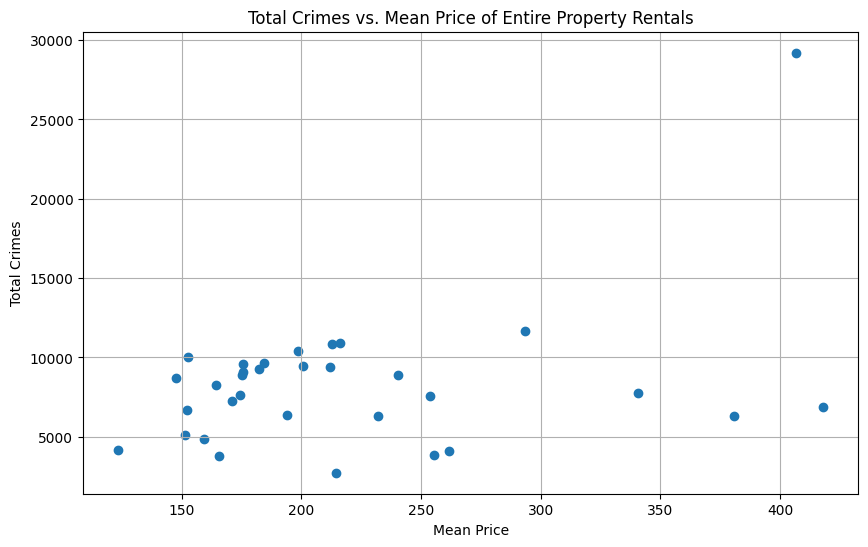

In [48]:
"""
Pretty bad
"""
# Extract the relevant columns from entire_property_merged
total_crimes = entire_property_merged['Total Crimes']
mean_price = entire_property_merged['Mean Price']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_price, total_crimes)
plt.xlabel('Mean Price')
plt.ylabel('Total Crimes')
plt.title('Total Crimes vs. Mean Price of Entire Property Rentals')
plt.grid(True)

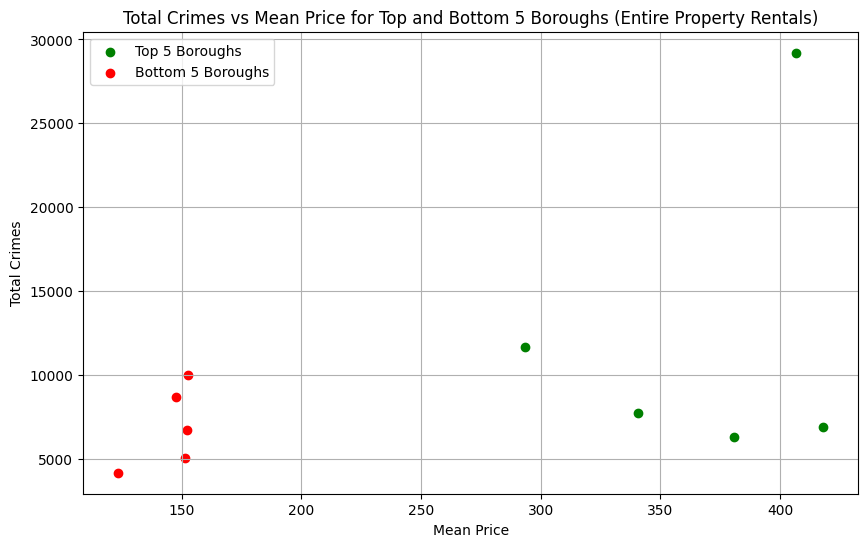

In [29]:
"""
Also bad
"""

# Sort entire_property_merged by mean price in ascending order
sorted_data = entire_property_merged.sort_values('Mean Price')

# Get the top 5 and bottom 5 boroughs by mean price
top_5 = sorted_data.tail(5)
bottom_5 = sorted_data.head(5)

# Extract the relevant columns for top 5 and bottom 5 boroughs
top_5_crimes = top_5['Total Crimes']
top_5_prices = top_5['Mean Price']
bottom_5_crimes = bottom_5['Total Crimes']
bottom_5_prices = bottom_5['Mean Price']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_5_prices, top_5_crimes, color='green', label='Top 5 Boroughs')
plt.scatter(bottom_5_prices, bottom_5_crimes, color='red', label='Bottom 5 Boroughs')
plt.xlabel('Mean Price')
plt.ylabel('Total Crimes')
plt.title('Total Crimes vs Mean Price for Top and Bottom 5 Boroughs (Entire Property Rentals)')
plt.legend()
plt.grid(True)

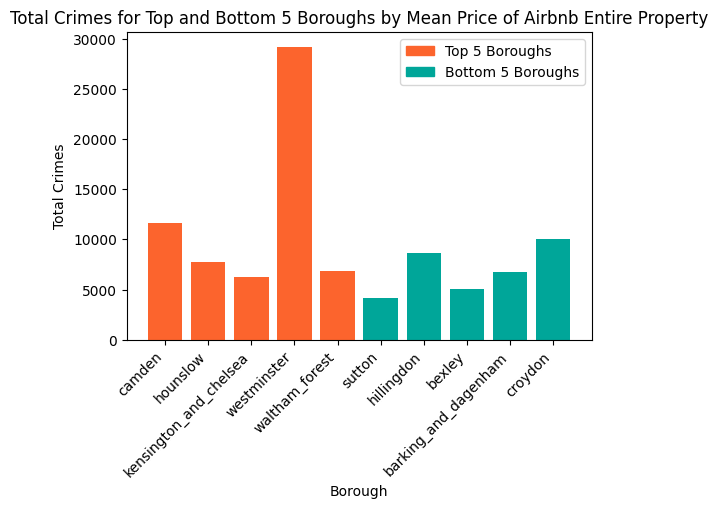

In [66]:
# Sort entire_property_merged by mean price in ascending order
sorted_data = entire_property_merged.sort_values('Mean Price')

# Get the top 5 and bottom 5 boroughs by mean price
top_5 = sorted_data.tail(5)
bottom_5 = sorted_data.head(5)

# Extract the relevant columns for top 5 and bottom 5 boroughs
top_5_crimes = top_5['Total Crimes']
bottom_5_crimes = bottom_5['Total Crimes']

# Create a list of borough names for the x-axis labels
boroughs = top_5.index.tolist() + bottom_5.index.tolist()

# Specify the colors for the bars
colors = ['#FC642D'] * 5 + ['#00A699'] * 5

# Create the bar plot for entire property rentals
plt.figure(figsize=(6, 4))
bars = plt.bar(boroughs, top_5_crimes.tolist() + bottom_5_crimes.tolist(), color=colors)
plt.xlabel('Borough')
plt.ylabel('Total Crimes')
plt.title('Total Crimes for Top and Bottom 5 Boroughs by Mean Price of Airbnb Entire Property')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Create a legend explaining the colours
legend_labels = ['Top 5 Boroughs', 'Bottom 5 Boroughs']
legend_colors = {'Top 5 Boroughs': '#FC642D', 'Bottom 5 Boroughs': '#00A699'}
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=legend_colors[label]) for label in legend_labels]
plt.legend(legend_handles, legend_labels)
# plt.savefig('comb1.pdf', dpi=300, bbox_inches='tight')

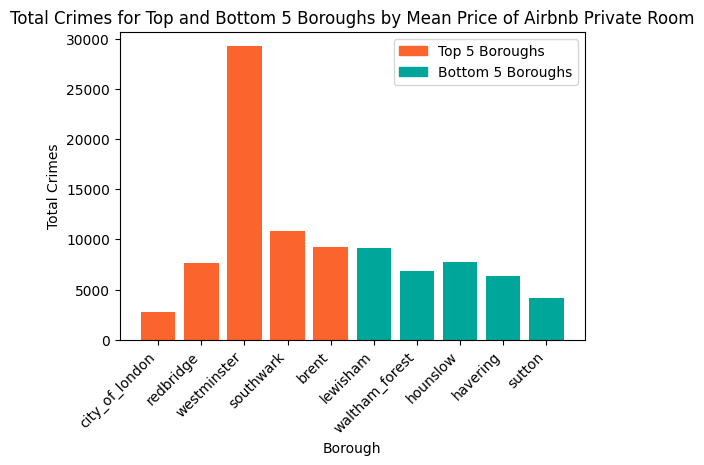

In [67]:
# Sort private_room_merged by mean price in ascending order
sorted_data = private_room_merged.sort_values('Mean Price')

# Get the top 5 and bottom 5 boroughs by mean price
top_5 = sorted_data.tail(5)
bottom_5 = sorted_data.head(5)

# Extract the relevant columns for top 5 and bottom 5 boroughs
top_5_crimes = top_5['Total Crimes']
bottom_5_crimes = bottom_5['Total Crimes']

# Create a list of borough names for the x-axis labels
boroughs = top_5.index.tolist() + bottom_5.index.tolist()

# Specify the colors for the bars
colors = ['#FC642D'] * 5 + ['#00A699'] * 5

# Create the bar plot for private room rentals
plt.figure(figsize=(6, 4))
bars = plt.bar(boroughs, top_5_crimes.tolist() + bottom_5_crimes.tolist(), color=colors)
plt.xlabel('Borough')
plt.ylabel('Total Crimes')
plt.title('Total Crimes for Top and Bottom 5 Boroughs by Mean Price of Airbnb Private Room')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Create a legend explaining the colours
legend_labels = ['Top 5 Boroughs', 'Bottom 5 Boroughs']
legend_colors = {'Top 5 Boroughs': '#FC642D', 'Bottom 5 Boroughs': '#00A699'}
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=legend_colors[label]) for label in legend_labels]
plt.legend(legend_handles, legend_labels)
# plt.savefig('comb2.pdf', dpi=300, bbox_inches='tight')

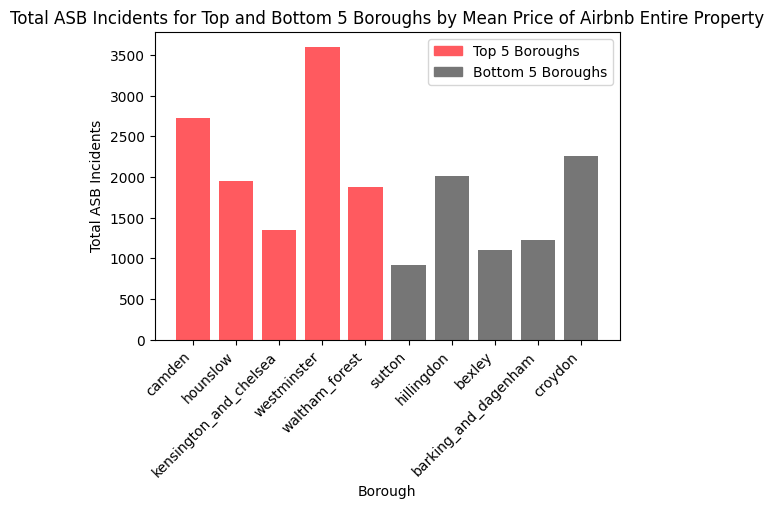

In [68]:
# Sort entire_property_merged by mean price in ascending order
sorted_data = entire_property_merged.sort_values('Mean Price')

# Get the top 5 and bottom 5 boroughs by mean price
top_5 = sorted_data.tail(5)
bottom_5 = sorted_data.head(5)

# Extract the relevant columns for top 5 and bottom 5 boroughs
top_5_asb_incidents = top_5['Total ASB Incidents']
bottom_5_asb_incidents = bottom_5['Total ASB Incidents']

# Create a list of borough names for the x-axis labels
boroughs = top_5.index.tolist() + bottom_5.index.tolist()

# Specify the colors for the bars
colors = ['#FF5A5F'] * 5 + ['#767676'] * 5

# Create the bar plot for entire property rentals
plt.figure(figsize=(6, 4))
bars = plt.bar(boroughs, top_5_asb_incidents.tolist() + bottom_5_asb_incidents.tolist(), color=colors)
plt.xlabel('Borough')
plt.ylabel('Total ASB Incidents')
plt.title('Total ASB Incidents for Top and Bottom 5 Boroughs by Mean Price of Airbnb Entire Property')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Create a legend explaining the colours
legend_labels = ['Top 5 Boroughs', 'Bottom 5 Boroughs']
legend_colors = {'Top 5 Boroughs': '#FF5A5F', 'Bottom 5 Boroughs': '#767676'}
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=legend_colors[label]) for label in legend_labels]
plt.legend(legend_handles, legend_labels)
# plt.savefig('comb3.pdf', dpi=300, bbox_inches='tight')

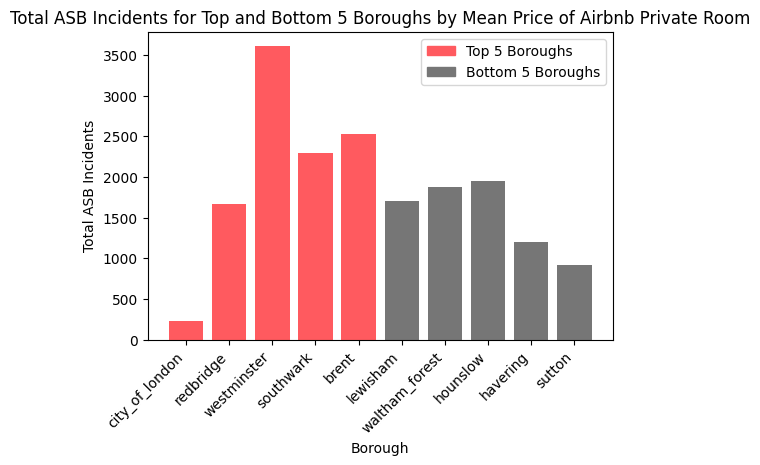

In [69]:
# Sort private_room_merged by mean price in ascending order
sorted_data = private_room_merged.sort_values('Mean Price')

# Get the top 5 and bottom 5 boroughs by mean price
top_5 = sorted_data.tail(5)
bottom_5 = sorted_data.head(5)

# Extract the relevant columns for top 5 and bottom 5 boroughs
top_5_asb_incidents = top_5['Total ASB Incidents']
bottom_5_asb_incidents = bottom_5['Total ASB Incidents']

# Create a list of borough names for the x-axis labels
boroughs = top_5.index.tolist() + bottom_5.index.tolist()

# Specify the colors for the bars
colors = ['#FF5A5F'] * 5 + ['#767676'] * 5

# Create the bar plot for private room rentals
plt.figure(figsize=(6, 4))
bars = plt.bar(boroughs, top_5_asb_incidents.tolist() + bottom_5_asb_incidents.tolist(), color=colors)
plt.xlabel('Borough')
plt.ylabel('Total ASB Incidents')
plt.title('Total ASB Incidents for Top and Bottom 5 Boroughs by Mean Price of Airbnb Private Room')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Create a legend explaining the colors
legend_labels = ['Top 5 Boroughs', 'Bottom 5 Boroughs']
legend_colors = {'Top 5 Boroughs': '#FF5A5F', 'Bottom 5 Boroughs': '#767676'}
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=legend_colors[label]) for label in legend_labels]
plt.legend(legend_handles, legend_labels)
# plt.savefig('comb4.pdf', dpi=300, bbox_inches='tight')

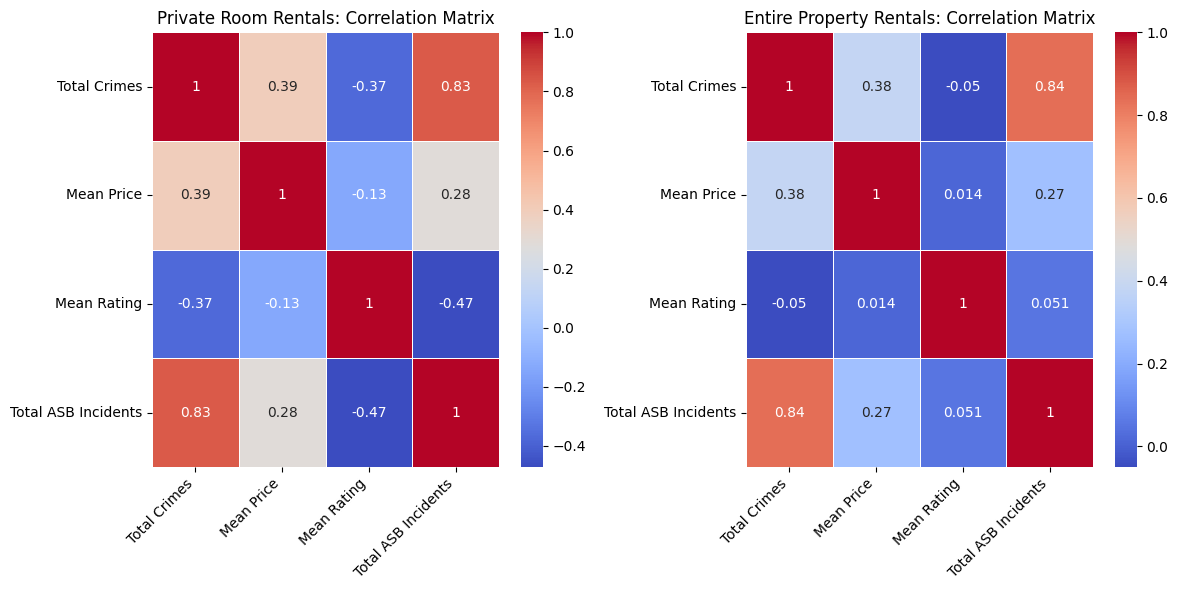

In [77]:
# Extract the required columns from the private_room_merged DataFrame
private_room_data = private_room_merged[['Total Crimes', 'Mean Price', 'Mean Rating', 'Total ASB Incidents']]

# Calculate the correlation matrix for private room rentals
private_room_corr_matrix = private_room_data.corr()

# Extract the required columns from the entire_property_merged DataFrame
entire_property_data = entire_property_merged[['Total Crimes', 'Mean Price', 'Mean Rating', 'Total ASB Incidents']]

# Calculate the correlation matrix for entire property rentals
entire_property_corr_matrix = entire_property_data.corr()

# Create subplots for the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the correlation matrix heatmap for private room rentals
sns.heatmap(private_room_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('Private Room Rentals: Correlation Matrix')
axes[0].set_xticklabels(private_room_corr_matrix.columns, rotation=45, ha='right')
axes[0].set_yticklabels(private_room_corr_matrix.columns, rotation=0)

# Plot the correlation matrix heatmap for entire property rentals
sns.heatmap(entire_property_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title('Entire Property Rentals: Correlation Matrix')
axes[1].set_xticklabels(entire_property_corr_matrix.columns, rotation=45, ha='right')
axes[1].set_yticklabels(entire_property_corr_matrix.columns, rotation=0)

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('comb5.pdf', dpi=300, bbox_inches='tight')